In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

> Import Data And Solve Some Problems

In [2]:
df = pd.read_csv(r'D:\Data\uber\My Uber Drives - 2016.csv')

In [3]:
df.sample(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
235,3/17/2016 18:47,3/17/2016 19:09,Personal,Houston,Houston,4.9,NaN
988,11/22/2016 15:12,11/22/2016 15:27,Business,Cary,Cary,5.5,Meeting
299,4/3/2016 2:00,4/3/2016 4:16,Business,Florence,Cary,159.3,Meeting
202,3/7/2016 13:57,3/7/2016 14:18,Business,Meredith Townes,Leesville Hollow,9.4,Meeting
302,4/7/2016 18:20,4/7/2016 18:39,Business,Cary,Morrisville,6.1,Meal/Entertain
877,10/30/2016 10:51,10/30/2016 11:21,Business,Bryson City,Bryson City,6.3,NaN
114,2/16/2016 16:34,2/16/2016 17:10,Business,Colombo,Colombo,6.0,NaN
724,8/27/2016 11:47,8/27/2016 12:06,Business,Lahore,Lahore,7.0,NaN
514,7/5/2016 0:00,7/5/2016 0:05,Business,Parkwood,Parkwood,1.2,Errand/Supplies
747,9/1/2016 18:49,9/1/2016 19:08,Business,Unknown Location,Unknown Location,2.2,NaN


In [4]:
df.rename(columns=lambda s:s[:-1] , inplace=True)

In [5]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


> work with date and get more features

In [7]:
# convert start and end dates to date time
df[df['START_DATE']=='Totals'] = np.nan
df['START_DATE'].dropna(inplace=True)
df['START_DATE'] = pd.to_datetime(df['START_DATE'],format = "%m/%d/%Y %H:%M",errors='ignore')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],format = "%m/%d/%Y %H:%M",errors='ignore')

In [8]:
# get trip time in minutes
df['TRIP_TIME']= df['END_DATE']-df['START_DATE']
df['TRIP_TIME'] = df['TRIP_TIME'] / np.timedelta64(1,'m')

In [9]:
time = (df['TRIP_TIME']/60)
df['SPEED'] = df['MILES']/ time

In [10]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776


In [11]:
df.describe()

,MILES,TRIP_TIME,SPEED
count,1155.000000,1155.000000,1155.000000
mean,10.566840,23.243290,inf
std,21.579106,27.318277,NaN
min,0.500000,0.000000,3.917355
25%,2.900000,10.000000,14.888276
50%,6.000000,16.000000,21.000000
75%,10.400000,27.500000,28.569805
max,310.300000,336.000000,inf


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
 7   TRIP_TIME   1155 non-null   float64       
 8   SPEED       1155 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 81.4+ KB


In [13]:
# get day from date
df['DAY'] = df['START_DATE'].dt.weekday
days = {0:'monday' ,1:'tusday',2:'wednesday',3:'thursday',4:'firday',5:'saturday',6:'sunday' }
df['DAY'] = df['DAY'].map(days)

In [14]:
# get hours from date
df['hour']=df['START_DATE'].dt.hour

In [15]:
def day_parts(hour):
    if hour >= 5 and hour < 12 :
        return 'Morning'
    elif hour >=12 and hour < 17 :
        return 'Afternoon'
    elif hour >= 17 and hour < 21 :
        return 'Evening '
    else:
        return 'Night'

In [16]:
# make day parts from hour column
df['DAY_PART'] = df['hour'].apply(day_parts)
del df['hour']

In [17]:
df['TRIP_TIME'].describe()

count    1155.000000
mean       23.243290
std        27.318277
min         0.000000
25%        10.000000
50%        16.000000
75%        27.500000
max       336.000000
Name: TRIP_TIME, dtype: float64

In [18]:
# make speed column form miles and time
time = (df['TRIP_TIME']/60)
df['SPEED'] = df['MILES']/ time

In [19]:
df[df['SPEED']==np.inf] = 0 

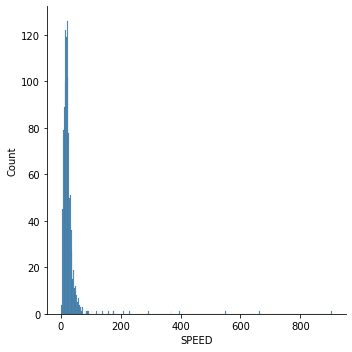

In [21]:
sns.displot(df['SPEED'])

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
 7   DAY_NAME    1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 72.4+ KB


In [394]:
df.describe()

,MILES,DAY_NAME
count,1155.000000,1155.000000
mean,10.566840,16.309091
std,21.579106,8.713157
min,0.500000,1.000000
25%,2.900000,9.000000
50%,6.000000,17.000000
75%,10.400000,24.000000
max,310.300000,31.000000


In [395]:
df['TRAVEL_TIME'] = df['END_DATE'] - df['START_DATE']
del df['END_DATE']
del df['START_DATE']

In [396]:
df['TRAVEL_TIME'] = df['TRAVEL_TIME']/ np.timedelta64(1,'m')

> EDA

In [397]:
# Utility Functions
palette_color = sns.color_palette('rocket_r')
def doughnuts(data , palette_color):
    # Create a pieplot
    plt.pie(x= data.values , labels=data.index , autopct='%.2f%%',shadow=True , startangle=90 , colors=palette_color)
    plt.axis('equal')
    # plt.legend(loc='upper right')
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    return p

In [398]:
df.head()

,CATEGORY,START,STOP,MILES,PURPOSE,DAY_NAME,TRAVEL_TIME
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1.0,6.0
1,Business,Fort Pierce,Fort Pierce,5.0,NaN,2.0,12.0
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2.0,13.0
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,5.0,14.0
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,6.0,67.0


> CATEGORY

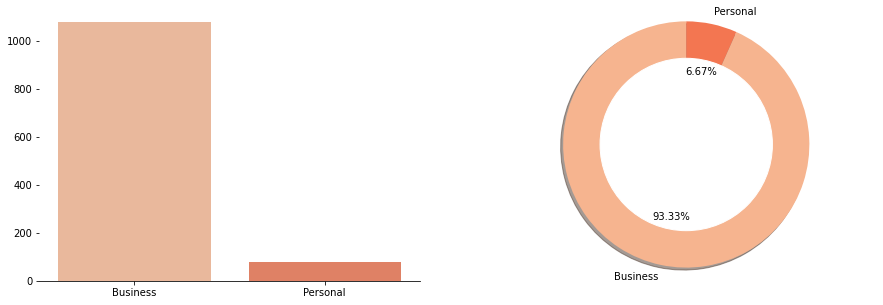

In [399]:
category_val = df['CATEGORY'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=category_val.index , y=category_val.values , palette=palette_color,ax=ax[0])
sns.despine(left=True)
ax[1]=doughnuts(category_val,palette_color)
plt.show()


> START

In [400]:
df['START'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [401]:
df[df['START'] == 'Unknown Location'] = np.nan

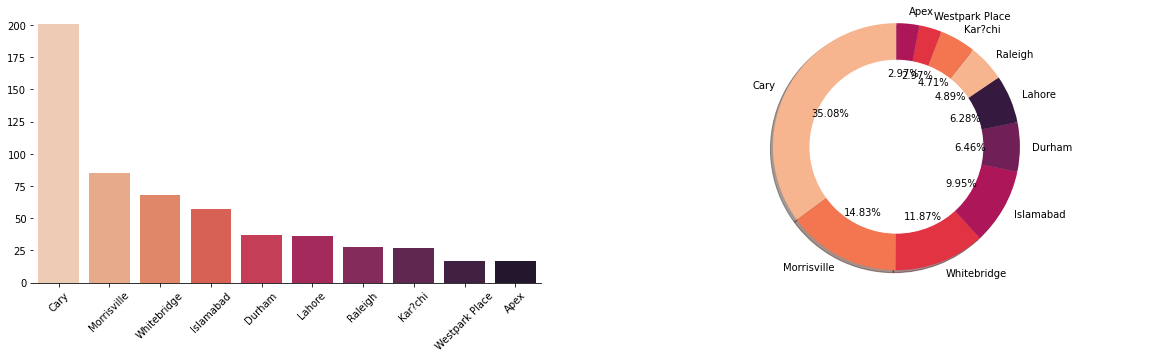

In [402]:
start_val = df['START'].value_counts().head(10)
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=start_val.index ,y=start_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
# plt.title('top 10 start points')
ax[1]=doughnuts(start_val,palette_color)

plt.show()

> STOP

In [403]:
stop_val = df['STOP'].value_counts().head(10)
stop_val

Cary                203
Morrisville          83
Whitebridge          65
Unknown Location     63
Durham               36
Islamabad            30
Raleigh              29
Lahore               27
Kar?chi              20
Apex                 17
Name: STOP, dtype: int64

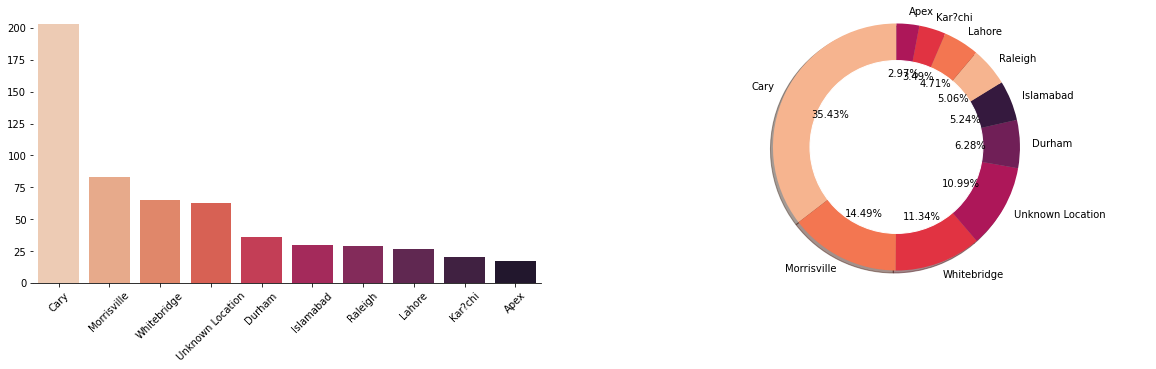

In [404]:
stop_val = df['STOP'].value_counts().head(10)
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=stop_val.index ,y=stop_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(stop_val,palette_color)


> MILES

In [405]:
df['MILES'].value_counts()

9.9     28
3.1     26
3.0     19
10.4    18
1.8     18
        ..
77.3     1
20.3     1
11.0     1
16.1     1
48.2     1
Name: MILES, Length: 235, dtype: int64

In [ ]:
jioh


In [495]:
m = {}


for i in df['MILES']:
    if i < 10:
        m.setdefault(i,'0-10 miles')
    elif i >= 10 and i < 20:
        m.setdefault(i,'10-20 miles')
    elif i >= 20 and i < 30:
        m.setdefault(i,'20-30 miles')
    elif i >= 30 and i < 40:
        m.setdefault(i,'30-40 miles')
    elif i >= 40 and i < 50:
        m.setdefault(i,'40-50 miles')
    else:
        m.setdefault(i,'Above 50 miles')
df['MILES'] = df['MILES'].map(m)

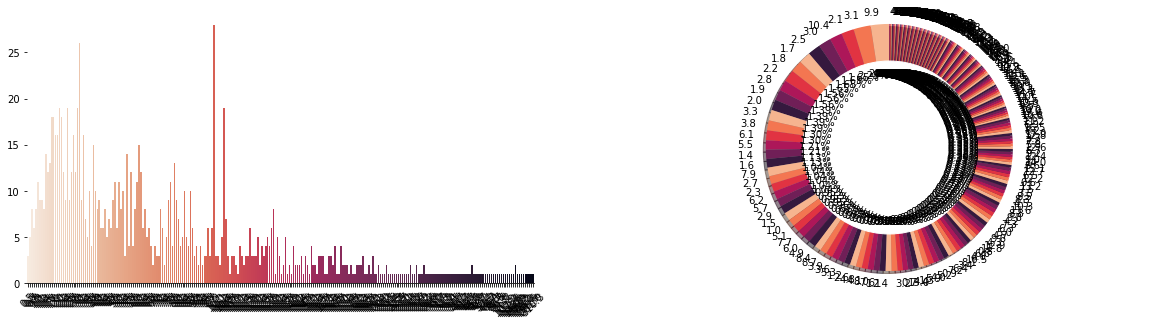

In [568]:
miles_val = df['MILES'].value_counts().sort_values(ascending=False)
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=miles_val.index ,y=miles_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(miles_val,palette_color)

In [498]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,DAY_PART
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,0-10 miles,Meal/Entertain,firday,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,0-10 miles,NaN,saturday,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,0-10 miles,Errand/Supplies,saturday,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,0-10 miles,Meeting,tusday,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Above 50 miles,Customer Visit,wednesday,Afternoon


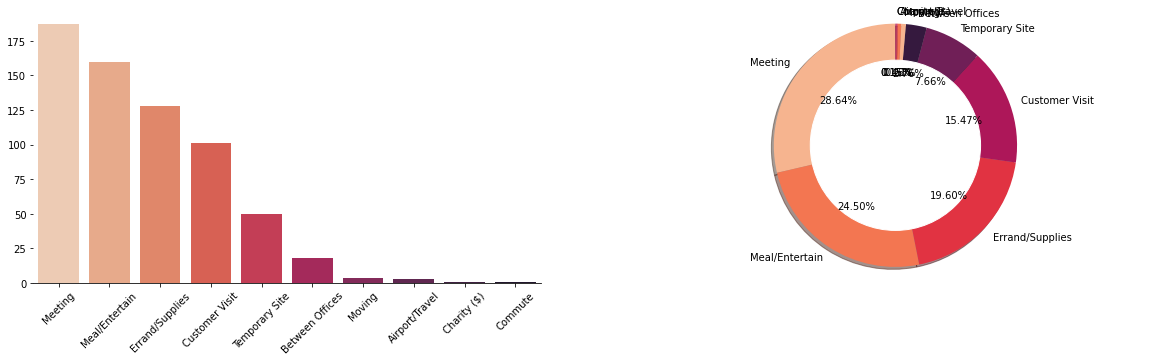

In [499]:
purpose_val = df['PURPOSE'].value_counts().head(10)
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=purpose_val.index ,y=purpose_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(purpose_val,palette_color)

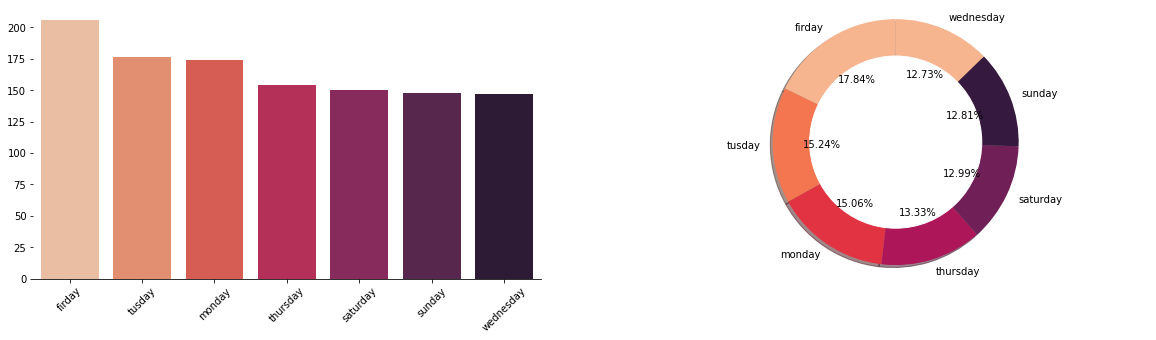

In [501]:
day_val = df['DAY'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=day_val.index ,y=day_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(day_val,palette_color)

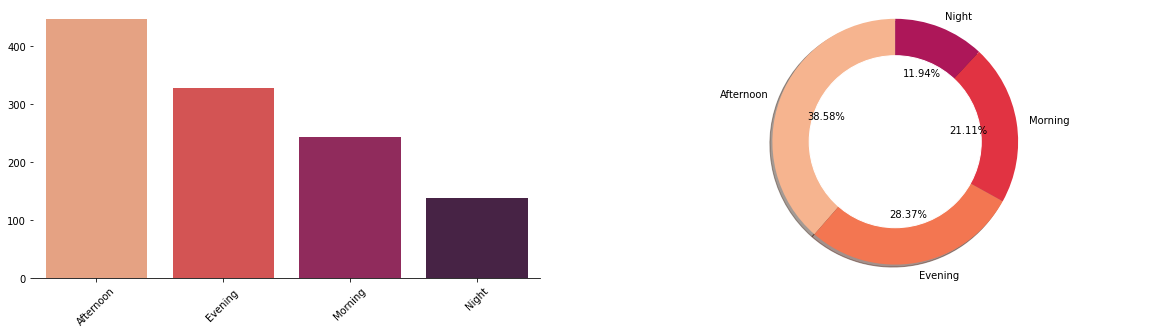

In [502]:
day_part_val = df['DAY_PART'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=day_part_val.index ,y=day_part_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(day_part_val,palette_color)

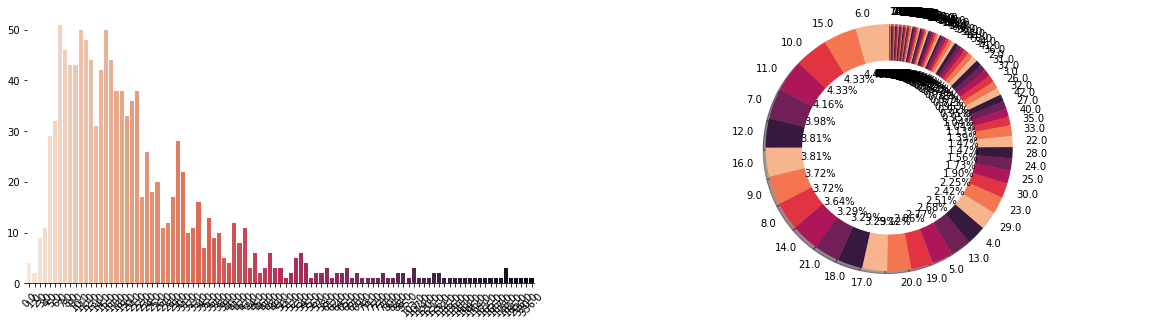

In [537]:
trip_time_val = df['TRIP_TIME'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=trip_time_val.index ,y=trip_time_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(trip_time_val,palette_color)

In [538]:
df.describe()

,TRIP_TIME
count,1155.000000
mean,23.243290
std,27.318277
min,0.000000
25%,10.000000
50%,16.000000
75%,27.500000
max,336.000000


In [511]:
df.groupby('DAY_PART')['MILES'].agg(pd.Series.mode)

DAY_PART
Afternoon    0-10 miles
Evening      0-10 miles
Morning      0-10 miles
Night        0-10 miles
Name: MILES, dtype: object

In [513]:
df.groupby('DAY_PART')['PURPOSE'].agg(pd.Series.mode)

DAY_PART
Afternoon           Meeting
Evening      Meal/Entertain
Morning             Meeting
Night               Meeting
Name: PURPOSE, dtype: object

In [512]:
df.groupby('DAY')['MILES'].agg(pd.Series.mode)

DAY
firday       0-10 miles
monday       0-10 miles
saturday     0-10 miles
sunday       0-10 miles
thursday     0-10 miles
tusday       0-10 miles
wednesday    0-10 miles
Name: MILES, dtype: object

In [536]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,DAY_PART,TRIP_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,0-10 miles,Meal/Entertain,firday,Night,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,0-10 miles,NaN,saturday,Night,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,0-10 miles,Errand/Supplies,saturday,Evening,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,0-10 miles,Meeting,tusday,Evening,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Above 50 miles,Customer Visit,wednesday,Afternoon,67.0


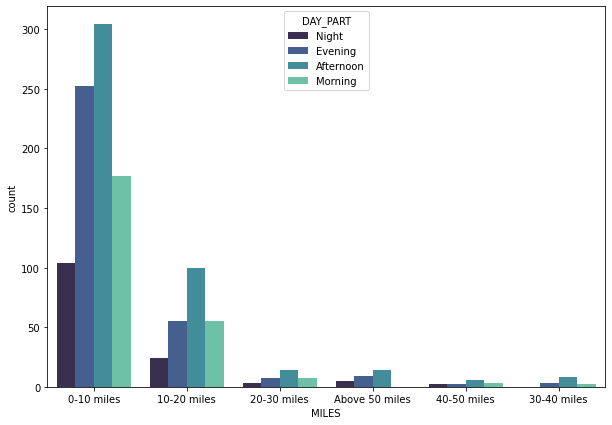

In [530]:
plt.figure(figsize=(10,7))
sns.countplot(df['MILES'], hue=df['DAY_PART'], palette='mako',order = df['MILES'].value_counts().index)
plt.show()

__Observations__
- there are 176 diffrent start point
- cary and morrisiville are the most start and end points 
- most trips take range from  0 to 10 miles
- popular purposes for trips are Meetings , Meals, Entertain and Errand  
- fridaay , tusday and monday are the most days have trips
- afternoon the highest time of the day has trips
